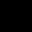

In [2]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32,3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

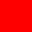

In [3]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image


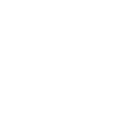

In [5]:
data = np.zeros([128, 128,3], dtype=np.uint8)
data[:, :] = [255, 255, 255]
image = Image.fromarray(data, 'RGB')
image

In [23]:
from PIL import Image
import os

# 파일 열기
img_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/pillow_practice.png'
image = Image.open(img_path)
image

# w h 출력
print(image.size)

#JPG 파일 형식으로 저장
image.convert('RGB').save(img_path[:-3]+"jpg")
image.resize((100, 200)).save(img_path)

(620, 465)


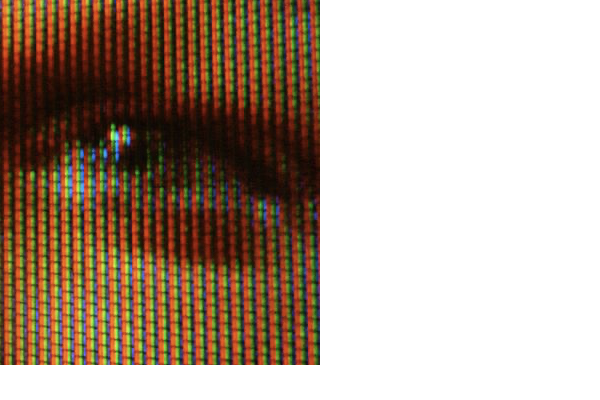

In [24]:
crop_image = image.crop((300, 100, 900, 500))
crop_image



In [66]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'

train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))

<class 'dict'>


In [28]:
train.keys()


dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [29]:
type(train[b'filenames'])


list

In [30]:
train[b'filenames'][0:5]


[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [31]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [32]:
train[b'data'][0].shape


(3072,)

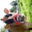

In [33]:
image_data = train[b'data'][0].reshape([32,32,3], order='F')
image = Image.fromarray(image_data)
image

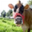

In [34]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image


In [67]:
import os
import numpy as np
import pickle
from PIL import Image
from tqdm import tqdm

dir_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, "train")

image_dir_path = os.getenv("HOME") + "/aiffel/python_image_proc/cifar-images"
if not os.path.exists(image_dir_path):
    os.mkdir(image_dir_path)

with open(train_file_path, "rb") as f:
    train = pickle.load(f, encoding="bytes")
    # for i in tqdm(range(5)):
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode("UTF-8")
        image_data = train[b'data'][i].reshape([32,32,3], order="F").swapaxes(0,1)
        image = Image.fromarray(image_data)
        image.save(os.path.join(image_dir_path,filename))

100%|██████████| 50000/50000 [00:33<00:00, 1504.15it/s]


In [73]:
import cv2 as cv
import numpy as np

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)


import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

dir_path = os.getenv("HOME") + '/aiffel/python_image_proc'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(dir_path, file_name)

    img= Image.open(image_path)
    cv_image = cv2.imread(image_path)

    f=plt.figure(figsize=(10, 3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ("b", "g", "r")
    for i, col in enumerate(color):
        histr = cv2.calcHist([cv_image], [i], None, [256], [0,256])
        im2.plot(histr, color=col)
    im2.set_title("Histogram")

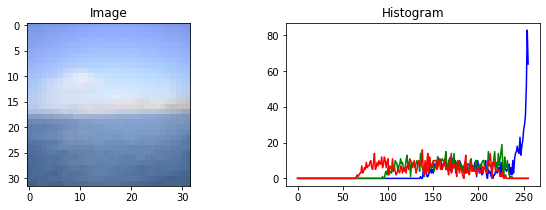

In [69]:
draw_color_histogram_from_image('adriatic_s_001807.png')


In [74]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [75]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram


array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [90]:
def build_histogram_db():
    histogram_db = {}

    path = image_dir_path
    file_list = os.listdir(image_dir_path)

    for f in tqdm(file_list):
        # print(os.path.join(path, f))
        image_path = os.path.join(path, f)
        image = cv2.imread(image_path)
        histogram_db[f] = get_histogram(image)

    return histogram_db

histogram_db = build_histogram_db()

100%|██████████| 49999/49999 [00:25<00:00, 1937.94it/s]


{'pachycephalosaurus_s_000322.png': array([[0.63405216],
        [0.09129776],
        [0.0107832 ],
        [0.        ],
        [0.5873249 ],
        [0.107832  ],
        [0.04025728],
        [0.00071888],
        [0.4342035 ],
        [0.18834655],
        [0.035944  ],
        [0.07763904]], dtype=float32),
 'male_child_s_001788.png': array([[0.37461093],
        [0.16448922],
        [0.2101217 ],
        [0.3374682 ],
        [0.42130464],
        [0.16130556],
        [0.36187628],
        [0.14220358],
        [0.36718237],
        [0.15175457],
        [0.26318276],
        [0.30457035]], dtype=float32),
 'palace_s_001770.png': array([[0.39068663],
        [0.38414404],
        [0.07664187],
        [0.10561624],
        [0.11215884],
        [0.34488842],
        [0.49630287],
        [0.00373863],
        [0.17571552],
        [0.3589083 ],
        [0.37853608],
        [0.04392888]], dtype=float32),
 'syrian_hamster_s_000185.png': array([[0.04063368],
        [0.42981407

In [102]:
histogram_db['adriatic_s_001807.png']

array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [91]:
def get_target_histogram():
    filename = input("이미지 파일명 : ")
    if filename not in histogram_db:
        print("db에 없는 파일명.")
        return None
    return histogram_db[filename]


In [103]:
target_histogram = get_target_histogram()
target_histogram


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [100]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    for filename, histogram in tqdm(histogram_db.items()):
        results[filename] = cv2.compareHist(H1=target_histogram, H2=histogram, method=cv2.HISTCMP_CORREL)

    results = sorted(results.items(), key=lambda x: x[1])

    return results[:top_k]

In [104]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 366981.14it/s]


[('carassius_auratus_s_000449.png', -0.9516285016249199),
 ('cichlid_s_000474.png', -0.9362194790272644),
 ('icbm_s_000730.png', -0.93605058874814),
 ('mountain_s_000083.png', -0.9272728307691589),
 ('northern_spy_s_000976.png', -0.9228183297907646)]

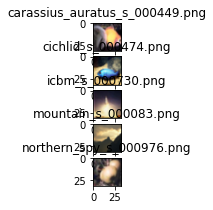

In [113]:
def show_result(result):
    f=plt.figure(figsize=(10, 3))
    for idx, filename in enumerate(result):
        file_path = os.path.join(images_dir_path, filename[0])
        image = Image.open(file_path)
        im = f.add_subplot(len(result),1,idx+1)
        im.imshow(image)
        im.set_title(filename[0])

show_result(result)